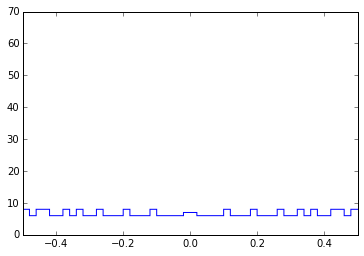

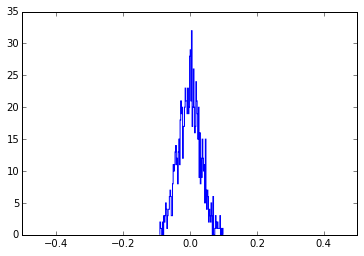

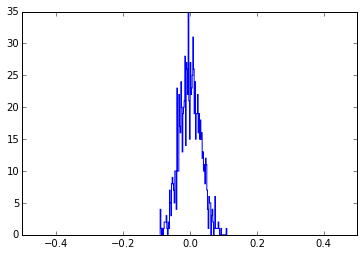

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline     

def corr(a, b):
    a -= np.mean(a);b -= np.mean(b)
    r=np.dot(a,b)/((np.sum(a**2)**0.5)*(np.sum(b**2)**0.5))
    return r
    

pi = np.pi
n = 1000.
n_ps = 10.
#phase_shift = np.linspace(0, pi/2. - (pi/2)/n_ps, n_ps).reshape(1, n_ps)
t = np.linspace(0, 2*pi-2*pi/n, n).reshape(n)
a = np.cos(t)
b = np.cos(t)

n_iter = 1000

_ = plt.hist(b, histtype='step', bins=100)
plt.xlim(-0.5, 0.5)
plt.show()

corr_shuffle = [corr(a, np.random.choice(b, size=b.shape)) for i in range(n_iter)]
_ = plt.hist(corr_shuffle, histtype='step', bins=100)
plt.xlim(-0.5, 0.5)
plt.show()

gaussian_shuffle = [corr(a, np.random.normal(size=b.shape)) for i in range(n_iter)]
_ = plt.hist(gaussian_shuffle, histtype='step', bins=100)
plt.xlim(-0.5, 0.5)
plt.show()